**Plan:**

**1. Regression**

**2. Classification**

# **1. Regression**

*  Linear regression relates **quantitative** output to one or several **quantitative** inputs.


* For example, restaurant manager could use linear regression to anticipate number of meals to prepare according to number of clients present in his restaurant


\begin{equation}
\mbox{meals} = w_1 \mbox{clients} + b,
\end{equation}


* where:
    * $w_1 \in {\rm I\!R} $ designates the **weight** of $\mbox{clients}$  in the determination of $\mbox{meals}$;
  
    * $b \in {\rm I\!R} $ is a another weight called **bias** because of its fixed impact on  $\mbox{meals}$.

## **Illustration of Regression**

In [1]:
import requests
from io import BytesIO
import pandas as pd

def download_csv(spread_sheet_id):
    try:
        r = requests.get('https://docs.google.com/spreadsheet/ccc?key='+ spread_sheet_id + '&output=csv')
        req_content = r.content
        df = pd.read_csv(BytesIO(req_content))
        return df
    except Exception as e:
        print(e)

dataset_id = '1q9vvZDzKiCxW9VCx9_jgoMR0GGgyUqMa-csW31hCxEY'

meal_df = download_csv(dataset_id)
display(meal_df.iloc[0:5])

,number_persons,number_ordered_meals
0,1,1
1,3,2
2,2,1
3,5,4
4,6,7


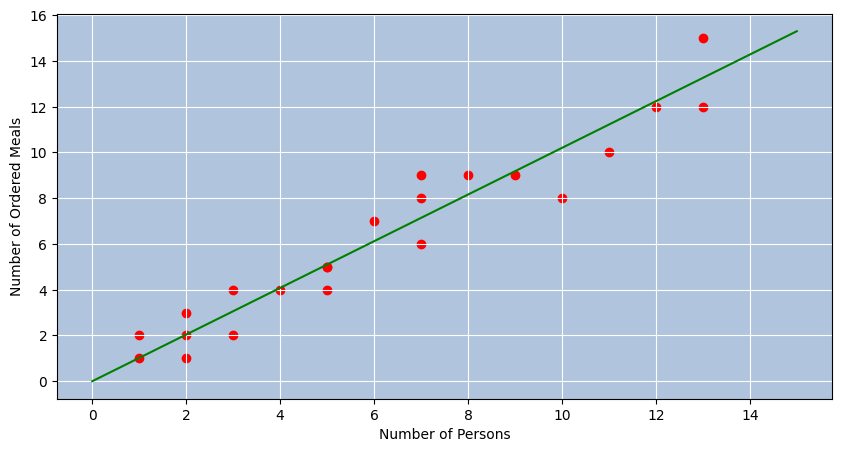

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.rcParams['axes.facecolor'] = 'lightsteelblue'
plt.grid(c='white')

plt.scatter(x = meal_df['number_persons'], y = meal_df['number_ordered_meals'], color = 'red')
plt.xlabel('Number of Persons')
plt.ylabel('Number of Ordered Meals')

x = np.arange(0, np.max(meal_df['number_persons'])+3)
y = 1.02*x

plt.plot(x, y, color = 'green')

## **Loss Function (Mean Squared Error)**

**Model**

* Simple linear regression is defined as  

\begin{equation}        
y = w_1 x + b,
\end{equation}

* where $w_1$ and $b$:

  * respectively represent slope and  intercept of the line

  * and whose values are **estimated** (or **learned**)  from  set of $n$ observations $\chi = \{(x^{(1)},y^{(1)}),\ldots, (x^{(n)},y^{(n)})\}$;


* Parameters are packaged into one row vector $\bf{\theta}$ $= [b, w_1]$ and estimated by optimizing some peformance criteria called **Loss Fonction**.



* Loss functions summarize model performance (according to its parameters $\bf{w}$) over  $\chi = \{(x^{(1)},y^{(1)}),\ldots, (x^{(n)},y^{(n)})\}$;



* Estimation of parameters is obtained by the **minimization** of $J(\bf{\theta})$;


* In regression like models, $J$ is defined as the mean of errors squared


\begin{equation}
J(\bf{\theta}) = \frac{1}{n}\sum_{i = 1}^{n}({y}^{(i)} - \hat{y}^{(i)} )^2,
\end{equation}

* where $\hat{y}^{(i)} =  w_1 x^{(i)} + b$ is the output of $x^{(i)}$ obtained with  $\bf{\theta}$.

![](https://drive.google.com/uc?export=view&id=1bQTzoxHu7mhfhdAZQ7pDt1Kq9EBrWgec)




## **Estimation of Parameters**

**<center><font size="+2">I. Analytical Approach:</font></center>**

* Linear regression can be extended to $d$ dimensional inputs

\begin{equation}
y^{(i)} = w_1 x_1^{(i)} +\cdots + w_d x_d^{(i)} + b.
\end{equation}


* Let $\bf{X}$ be $n \times \left(d+1\right)$ matrix including all data inputs and $\bf{y} \in {\rm I\!R}$ the associated outputs where


\begin{equation}
\bf{X} =
\begin{bmatrix}
    1      & x_{1}^{(1)} & \dots  & x_{d}^{(1)} \\
    1      & x_{1}^{(2)} & \dots  & x_{d}^{(2)} \\
    \vdots & \vdots & \ddots & \vdots \\
    1      & x_{1}^{(n)} & \dots  & x_{d}^{(n)}
\end{bmatrix}
\end{equation}


* This linear model can be written in the following compact form


\begin{equation}
\bf{y} = \bf{\theta}^T \bf{X}^T,
\end{equation}

where $\bf{\theta}$ $= [b,w_1,\ldots,w_d]^T$.


* Vector of parameters $\bf{\theta}$ can be obtained analytically as follows


\begin{equation}
\bf{\hat{\theta}} = (\bf{X^{T}X})^{-1}\bf{X^T}\bf{y}.
\end{equation}


* Because of computation cost relevant to matrix inversions, analytical approach become impractical in big datasets;


* **Gradient-Based** approaches become the default alternative to iteratively minimize $J(\bf{\theta})$;



**Quick Recall on Gradient Descent**



* Gradient Descent is fed with data $\bf{X}, \bf{y}$ and iteratively minimizes $J$ by updating each parameter $w_j$  

\begin{equation}
w_{j}^{[i]} \leftarrow w_{j}^{[i-1]} - \delta \frac{\partial J}{\partial w_{j}^{[i-1]}}.
\end{equation}


* where $\delta > 0$ as the **learning rate** that defines the step by which the value of the parameter is altered.

**<center><font size="+2">II. Training of Linear Regression in Python/Numpy</font></center>**

**Problem Statement**

* Consider simple linear regression problem presented above

\begin{equation}
\mbox{meals} = w_1 \mbox{clients} + b.
\end{equation}

* Implement gradient-descent to estimate $w_1$ and $b$ using only ***numpy***

* Dataset can be downloaded with

To resolve the problem, we follow this steps:

 **1. Gradient Expression**

 **2. Python Implementation of Gradient Expression**

 **3. Python Implementation of  Loss Function (MSE)**

 **4. Python Implementation of Gradient Descent Algorithm**

  **5. Visualization of MSE values and the fitted model over data**

**<font size="+2">1. Gradient Expression</font>**

* Before we compute the gradient of $J$ w.r.t $\bf{w}$ let us decompose $J$ as a sum of quadratic differences


\begin{equation}
J(\bf{w}) = \frac{1}{n}\sum_{i = 1}^{n}(\hat{y}^{(i)} - y^{(i)} )^2 = \frac{1}{n}\left[(w_1 x_1^{(1)} + b - y^{(1)} )^2 + \cdots + (w_1 x_1^{(n)} + b - y^{(n)} )^2 \right].
\end{equation}

* To get the partial derivatives we respectively apply rules of linearity, power and chaining

\begin{equation}
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i = 1}^{n} \left(b + w_1x^{(i)} - y^{(i)}\right).\\
\frac{\partial J}{\partial w_1}  = \frac{2}{n} \sum_{i = 1}^{n} \left( {x_1^{(i)}}^2w_1 + bx_1^{(i)} -y^{(i)}  x_1^{(i)}\right).\\
\end{equation}


* Now we can write the parameter update rule

\begin{equation}
\bf{w}^{[i]} \leftarrow \bf{w}^{[i-1]} - \delta
\begin{bmatrix}
\frac{2}{n} \sum_{i = 1}^{n} \left(b + w_1x^{(i)} - y^{(i)}\right)\\
\frac{2}{n} \sum_{i = 1}^{n} \left( {x_1^{(i)}}^2w_1 + bx_1^{(i)} -y^{(i)}  x_1^{(i)}\right)
\end{bmatrix}.
\end{equation}

**<font size="+2">2. Python Implementation of the Gradient Expression</font>**

In [ ]:
# Load the dataset
import requests
from io import BytesIO
import pandas as pd

def download_csv(spread_sheet_id):
    try:
        r = requests.get('https://docs.google.com/spreadsheet/ccc?key='+ spread_sheet_id + '&output=csv')
        req_content = r.content
        df = pd.read_csv(BytesIO(req_content))
        return df
    except Exception as e:
        print(e)

dataset_id = '1q9vvZDzKiCxW9VCx9_jgoMR0GGgyUqMa-csW31hCxEY'

meal_df = download_csv(dataset_id)

In [ ]:
# Compute the gradient
import numpy as np
import decimal
import matplotlib.pyplot as plt

def gradient_J(X,y,w):
    return(np.array([
            (2/len(X))*np.sum((w[0]) + (w[1]*X[:,1]) - y),
            (2/len(X))*np.sum((np.power(X[:,1],2)*w[1]) - (y*X[:,1]) + (w[0]*X[:,1]))
                   ]))

**<font size="+2">3. Python Implementation of Loss Function (MSE)</font>**

In [ ]:
# Build the loss function
def mse(w, X, Y):
    return (1/len(X)) * np.sum(np.square(Y - (w[0] + w[1]*X)))

**<font size="+2">4. Python Implementation of  Gradient Descent Algorithm</font>**

In [ ]:
# Build Gradient Descent Algorithm
decimal.getcontext().rounding = decimal.ROUND_DOWN

x = np.array(meal_df['number_persons'].tolist())
y = np.array(meal_df['number_ordered_meals'].tolist())


X = np.column_stack([np.ones(len(x)), x])
w = np.array([-10,10])
N = 2000
mse_track = np.zeros(N)
w_track = np.zeros([N,2])
delta = 0.01

for i in range(0, N):
    w = w - delta * gradient_J(X,y,w)
    mse_track[i] = mse(w, X[:,1], y)
    w_track[i] = w

mse_track = np.array([float(round(decimal.Decimal(mse),3)) for mse in mse_track])

**<font size="+2">5. Visualization of MSE values and the fitted model</font>**

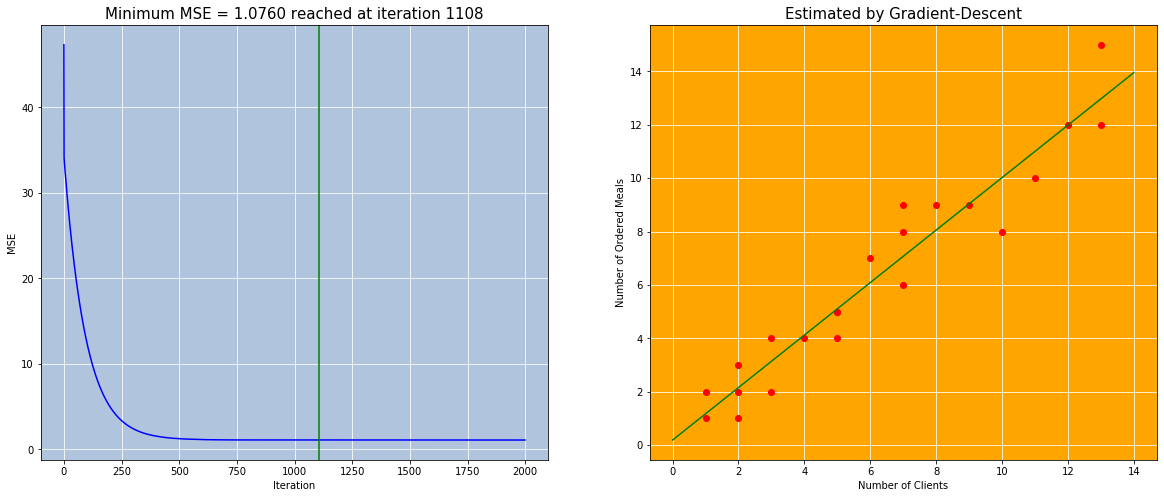

In [ ]:
# Visualize of error
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.rcParams['axes.facecolor'] = 'orange'
plt.grid(c='white')
idx_min = np.argmin(mse_track)
plt.plot(np.arange(0,N), mse_track, 'blue')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Minimum MSE = {:.4f} reached at iteration {}'.format(min(mse_track),idx_min+1), fontsize = 15)
plt.axvline(x = idx_min, color = 'green')


plt.subplot(1,2,2)
plt.rcParams['axes.facecolor'] = 'lightsteelblue'
plt.grid(c='white')
line_x = np.arange(0,max(x)+2)
w_hat = w_track[idx_min]
plt.plot(x, y, 'ro', line_x, w_hat[1]*line_x + w_hat[0], 'g')
plt.xlabel('Number of Clients')
plt.ylabel('Number of Ordered Meals')
plt.title('Estimated by Gradient-Descent', fontsize = 15)
plt.show()

### **Regression Metrics**

**Root Mean Squared Error (RMSE)**

* RMSE measures the average deviation w.r.t real target in its original unit.

\\

\begin{equation}
RMSE(\bf{\theta}) = \sqrt(\frac{1}{n}\sum_{i = 1}^{n}({y}^{(i)} - \hat{y}^{(i)} )^2).
\end{equation}

#### **Coefficient of Determination (r$^2$)**

*  goodness of fit criterion defined into $]- \infty, 1]$;

* The closer to $1$ the better the goodness of fit is;

\\

\begin{equation}
\bf{r}^2(\theta) = 1 - \frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}},
\end{equation}

\\

* where

$$
\mbox{SS}_{res} = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2, \quad \mbox{SS}_{tot} = \sum_{i = 1}^{n} (y_i - \bar{y})^2.
$$

# **2. Classification**

## **Introduction to Binary Logistic Regression**



* Model that relates **categorical** output to one or several **quantitative** inputs;


* For example, one can use logistic regression to **determine** whether a person is a **child or adult**  **from** informations about their weight in **kgs** and height in **cms** ;


![](https://drive.google.com/uc?export=view&id=12gtdjxV3B-_m44yluVAilua0_TFX_YYJ)





* The green line above may serve as **model** separating the two classes whose equation is  

\\

\begin{equation}
\mbox{height} = - \mbox{weight} + 180.
\end{equation}

\\

* To infer the category from given values of ***height*** and ***weight*** we define the function

\\

\begin{equation}
f(\mbox{weight},\mbox{height}) = \mbox{weight} + \mbox{height}  - 180.
\end{equation}

\\


* Quantity $f(\mbox{weight},\mbox{height})$ is refered as  **score** and serves the class inference as follows:

  * $f(\mbox{weight},\mbox{height}) > 0$: the point  $\left(\mbox{weight},\mbox{height}\right)$  lies **above** the green line thus in the **adults** class;

  - $f(\mbox{weight},\mbox{height}) < 0$: the point is **below** the green line and thus in **children** class;

  - $f(\mbox{weight},\mbox{height}) = 0$: the point lies **on** the green line and thus the person is considered to belong to **both** classes.

* The score $f(\mbox{weight},\mbox{height})$ is **translated** into **probability** through **Logistic Function**


\begin{equation}
P \left(\mbox{score} \right) = \frac{1}{1 + e^{-\mbox{score}}}.
\end{equation}



* Logistic Function is also known as **Sigmoid** and its plot is

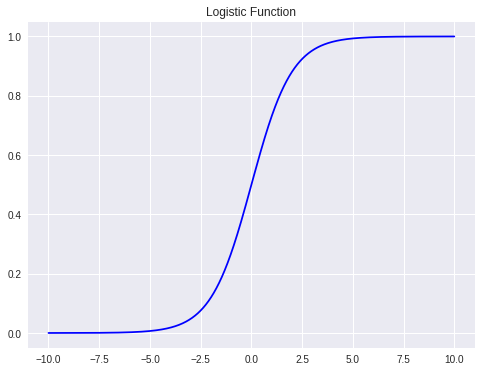

* It is obvious from the plot above that for any $z \in {\rm I\!R}, \quad \mbox{sigmoid}(z) \in [0,1]$.


**Demonstration of Inference Mecanism**




* Recall that **points** are mere **representations** of **vectors** and so the **points** in  

![](https://drive.google.com/uc?export=view&id=12gtdjxV3B-_m44yluVAilua0_TFX_YYJ)



* are **shortcuts** of the **vectors**

![](https://drive.google.com/uc?export=view&id=1zK5dFGTpEB2IkkkybWCKuomulVyCSJp5)



* Consider centered data with a separator with **null intercept**  

\begin{equation}
f(\mbox{weight},\mbox{height}) = \mbox{weight} + \mbox{height},
\end{equation}


* $f(\mbox{weight},\mbox{height})$ can be expressed as a dot product between $\bf{w} = [1,1]$ and $\bf{x} = [\mbox{weight},\mbox{height}]^T$


\begin{equation}
f(\mbox{weight},\mbox{height})   = [1, 1]
\begin{bmatrix}
\mbox{weight}\\
\mbox{height}
\end{bmatrix} =
\bf{w}\bf{x}.
\end{equation}

* With this formulation, we demonstrate the different signs of infering mechanism:
  - $f(\mbox{weight},\mbox{height}) > 0$: the point  $\left(\mbox{weight},\mbox{height}\right)$  lies **above** the line thus in the **adults** class;

  - $f(\mbox{weight},\mbox{height}) < 0$: the point is **below** the line and thus in **children** class;

  - $f(\mbox{weight},\mbox{height}) = 0$: the point lies **on** the line and thus the person is considered to belong to **both** classes.

  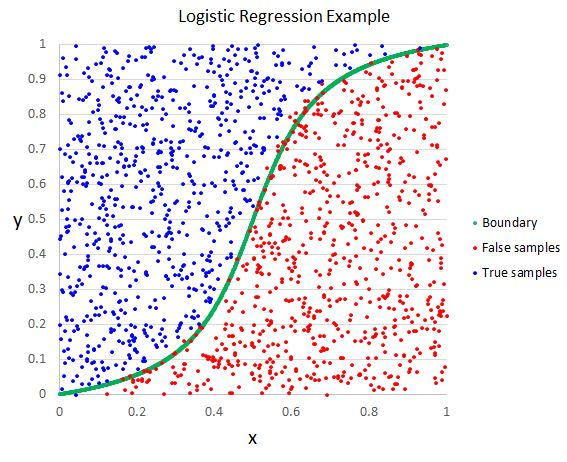



* Vector $\bf{w}$ (in orange and which happens to be perpendicular to the seperator):
  * red vectors which form angles $\theta \in \left] \frac{3\pi}{2},\frac{\pi}{2} \right[$ with $\bf{w}$ result into positive dot products and so  $f(\mbox{weight},\mbox{height}) > 0$;

  * vectors lying on the green line form two possible angles $\theta \in \{ \frac{\pi}{2},\frac{3\pi}{2} \}$ both leading to null $\cos(\theta)$ and so $f(\mbox{weight},\mbox{height}) = 0$;  

  * blue vectors form angles $\theta \in \left] \frac{\pi}{2},\frac{3\pi}{2} \right[$ with $\bf{w}$ and result into negative dot products and so  $f(\mbox{weight},\mbox{height}) < 0$.
  



**Formalization of Binary Logistic**



* Binary logistic regression associates the probability for given input $\bf{x} = [x_1,\ldots,x_d]^T$ belongs to class $1$

\\

\begin{equation}
P(y = 1| \bf{x}) = \frac{1}{1 + e^{-(\bf{w}^T\bf{x} + b})},
\end{equation}

\\

* where $\bf{w}^T \in  {\rm I\!R}^d$ is the vector of weights and $b \in  {\rm I\!R}$ the bias.


* Note that  model computes the belonging probability to one class **only**;

* The belonging probability to the other class is deduced by complementary rule of probability

\\

\begin{equation}
P(y = 0 | \bf{x}) = 1 -P(y = 1| \bf{x}) .
\end{equation}

##  **Softmax Regression**




* Softmax regression is the extension  of logistic regression over $C$ classes.


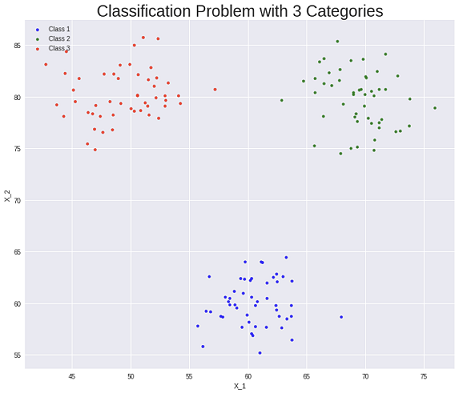

* To deal with $C$ classes, we define $C$ binary regressions where each category discriminates its specific class over all the others.

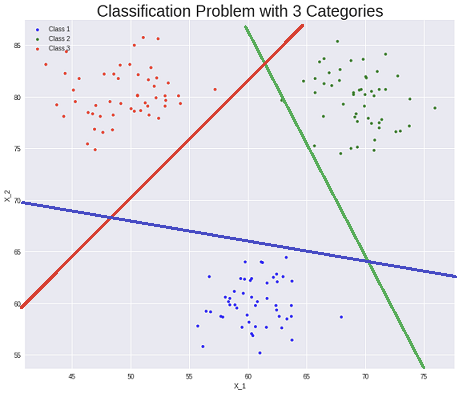

**Model of Softmax Regression**



*  Let  $\bf{x} \in {\rm I\!R^d}$ be given data point, softmax regression calculates the belonging probability to every class
  
\begin{equation}
\begin{bmatrix}
P(y = 1 | \bf{x})\\
\vdots\\
P(y = C | \bf{x}),
\end{bmatrix}
\end{equation}

* such as  $\sum_{k = 1}^C  P(y = k | \bf{x}) = 1$.



* Vector of probabilities above is obtained through vector of scores $\bf{s}$

\begin{equation}
\bf{s} =
\begin{bmatrix}
s_1\\
\vdots\\
s_C
\end{bmatrix}
= \bf{W} \bf{x} + b =
\begin{bmatrix}
w_{11} & \ldots & w_{1d}\\
\vdots & \ddots & \vdots\\
w_{C1} & \ldots & w_{Cd}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots\\
x_d
\end{bmatrix} +
\begin{bmatrix}
b_1\\
\vdots\\
b_C
\end{bmatrix}
\end{equation}


* where $\bf{W} \in  {\rm I\!R^{C \times d}}$ and $\bf{b} \in  {\rm I\!R^C}$ are respectively the matrix of weights and the vector of biaises.

* The $k^{th}$ row of $\bf{W}$ with the $k^{th}$ element of $\bf{b}$ list the parameters of the logistic regression that classifies the elements of the class $k$ against all the others.



* Vector of scores $\bf{s}$ is transformed into vector of probabilities $\bf{\hat{p}} \in  {\rm I\!R^C}$

\begin{equation}
\bf{\hat{p}}=
\begin{bmatrix}
\hat{p}_1\\
\vdots\\
\hat{p}_C\\
\end{bmatrix}
=
\begin{bmatrix}
\frac{e^{s_1}}{\sum_{i = 1}^{C} e^{s_i}}\\
\vdots\\
\frac{e^{s_C}}{\sum_{i = 1}^{C} e^{s_i}}\\
\end{bmatrix}.
\end{equation}



* The function that transforms each score $s_k$ from $\bf{s}$  into probability is called **softmax**.


* Note to transform $s_k$ into $\hat{p}_k$ the **scalar** softmax function requires **vector** of scores $\bf{s}$

\begin{equation}
\mbox{softmax}(k,\bf{s}) = \frac{e^{s_k}}{\sum_{j = 1}^{C} e^{s_j}}.
\end{equation}


* **Vector** version of softmax function is defined as

\begin{equation}
\mbox{softmax}(\bf{s}) =
\begin{bmatrix}
\mbox{softmax}(1,\bf{s})\\
\vdots\\
\mbox{softmax}(C,\bf{s})
\end{bmatrix}.
\end{equation}


* Finally  softmax of any $\bf{x}$ can compactly be expressed as

\begin{equation}
\hat{\bf{p}} =  \mbox{softmax}(\bf{W} \bf{x} + \bf{b}).
\end{equation}

## **Loss Function (Cross Entropy)**

#### **Definition**

* Cross entropy is the by default loss function in classification models;


* Cross entropy is also known as **negative log-likelihood** defined by

\\

\begin{equation}
J(\bf{W}, \bf{b}) = \frac{1}{n}\sum_{i = 1}^n \sum_{k = 1}^C -p_{i,k} \log(\hat{p}_{i,k}),
\end{equation}

\\

* where $p_{i,k}$ and $\hat{p}_{i,k}$ are respectively  **true** and  **estimated** probabilities that the $i^{th}$ observation belongs to class $k$;

#### **Details**

* Consider $\bf{P}$ one-hot encoded:

 * we have $p_{i,y_i} = 1$  and $\{p_{i,j} = 0, j \neq y_i\}$ leading to $\sum_{j = 1}^k - p_{i,j} \log(\hat{p}_{i,j}) = - \log(\hat{p}_{i,y_i})$.

 * If $\hat{p}_{i,y_i}$ tends to $1$ its $\log$  tends to $0$ (see red plot below);

  * If however $\hat{p}_{i,y_i}$ tends to $0$ then its $\log$  will go towards $- \infty$ (see red plot below);

  * from this we get that the less precise we predict $\hat{p}_{i,y_i}$ the bigger will be $- \hat{p}_{i,j}$ and vice versa (see blue plot below);

  * The operation  $ \frac{1}{n}\sum_{i = 1}^n$ produces an average of the negative log-likelihoods.


*  In case  $P_{i,:}$ are not one-hot vectors the mechanism described above still applies.

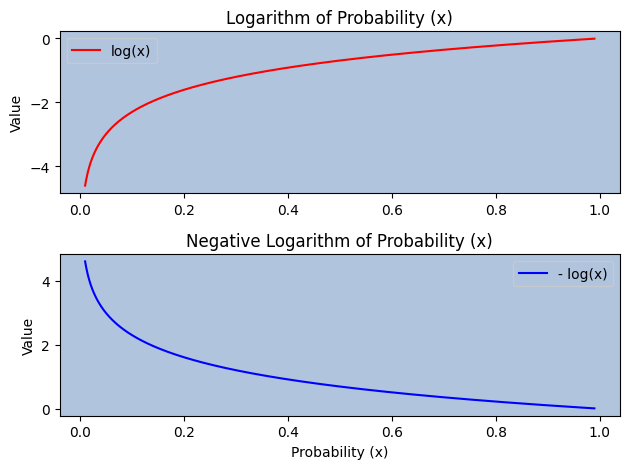


## **Estimation of Parameters**

* Minimization of $J$ is done through Gradient Descent;

* Gradients of $J$ w.r.t $\bf{W}, \bf{b}$ noted $\nabla_{\theta} J$ where $\theta = [\bf{W}, \bf{b}]$ are computed iteratively;


* Cross-entropy is defined as  


\begin{equation}
J(\theta) = \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k -p_{i,j} \log(\hat{p}_{i,j}) .
\end{equation}







* Cross-entropy w.r.t **weights and biaises** is expressed as

\begin{equation}
J(\theta) = \frac{-1}{n}\sum_{i = 1}^n \sum_{j = 1}^k p_{i,j} \log \left( \frac{e^{\bf{W}_{j,:}\bf{X}_{:,i}^T + b_j } }{\sum_{l = 1}^k e^{\bf{W}_{l,:}\bf{X}_{:,i}^T + b_l} }  \right).
\end{equation}



* The above equation shows that observations $\bf{X}_{:,i}$, probabilities $p_{i,j}$ and parameters $\bf{W}_{i,j}, b_i$ are all  intertwined;




* To see clearer we visualize computational graph of $J$ defined on a $2 \times 2$ dataset $\bf{X}$ with $2$ categories;



![](https://drive.google.com/uc?export=view&id=1vU7UhPRACpUsgvcVHLqeO7UbB_b7TpoB)

## **Classification Metrics**


* In binary classification the class of interest is denoted as **positive**;

* By contrast, the other class is denoted as **negative**;

* Matrix of Confusion summarizes predictions on $N$ examples in terms of positives and negatives as follows

\\

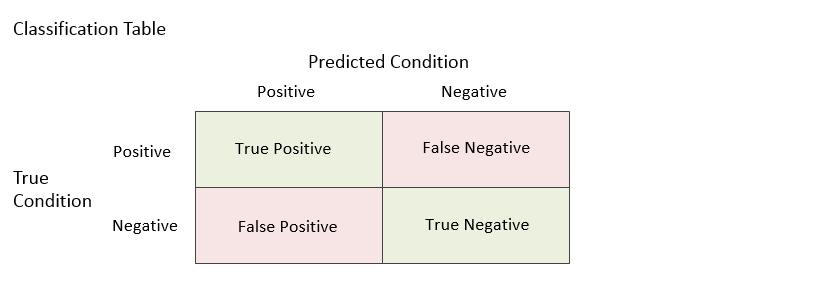

\\

* When both classes are equal in proportion, one simple way to measure the quality of the trained model is the **Accuracy**

\\

$$
\mbox{Accuracy} = \frac{\mbox{TP} + \mbox{TN}}{N}
$$

\\

* When classes are unbalanced we monitor two metrics:

  1. **Precision**: rate of True Positives from all what has been predicted positive by the model
$$
\mbox{Precision} = \frac{\mbox{TP}}{\mbox{TP} + \mbox{FP}}.
$$

  2. **Recall**: rate of true positives from all the real positives
$$
\mbox{Recall} = \frac{\mbox{TP}}{\mbox{TP} + \mbox{FN}}.
$$

* In practice, Precision and Recall are aggregated into one metric known as **$F_1$ score** defined as

\\

$$
F_1 = \frac{2 \times \mbox{Precision} \times \mbox{Recall}}{\mbox{Precision} + \mbox{Recall}}
$$

\\

* It is important to note that Precision and Recall evolve in opposite ways and thus a tradeoff has to be made according to the problem at stake

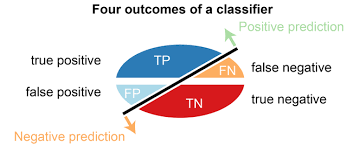

## **Logistic/Softmax in skearn**

### **Logistic Regression**

* From breast cancer dataset, predict the diagnostic from the series of attributes:

    - **radius**: (mean of distances from center to points on the perimeter)
    - **texture**: (standard deviation of gray-scale values)
    - **perimeter**:
    - **area**:
    - **smoothness**: (local variation in radius lengths)
    - **compactness**: (perimeter^2 / area - 1.0)
    - **concavity**: (severity of concave portions of the contour)
    - **concave points**: (number of concave portions of the contour)
    - **symmetry**:
    - **fractal dimension**: ("coastline approximation" - 1)

#### **Step 0: Load Packages + Download Data**

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['diagnostic'] = cancer.target
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### **Step 1: Split Data into Train and Test**

In [ ]:
X = cancer_df.drop('diagnostic', axis = 1)
y = cancer_df['diagnostic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

#### **Step 2: Train and Test Logistic Regression Model**

In [ ]:
#Train
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Test
y_hat = lr.predict(X_test)

#Accuracy
accuracy = lr.score(X_test, y_test)
print('Accuracy of our model = ' + '%2.f'%(accuracy*100) + '%.')

Accuracy of our model = 95%.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **Softmax Regression**

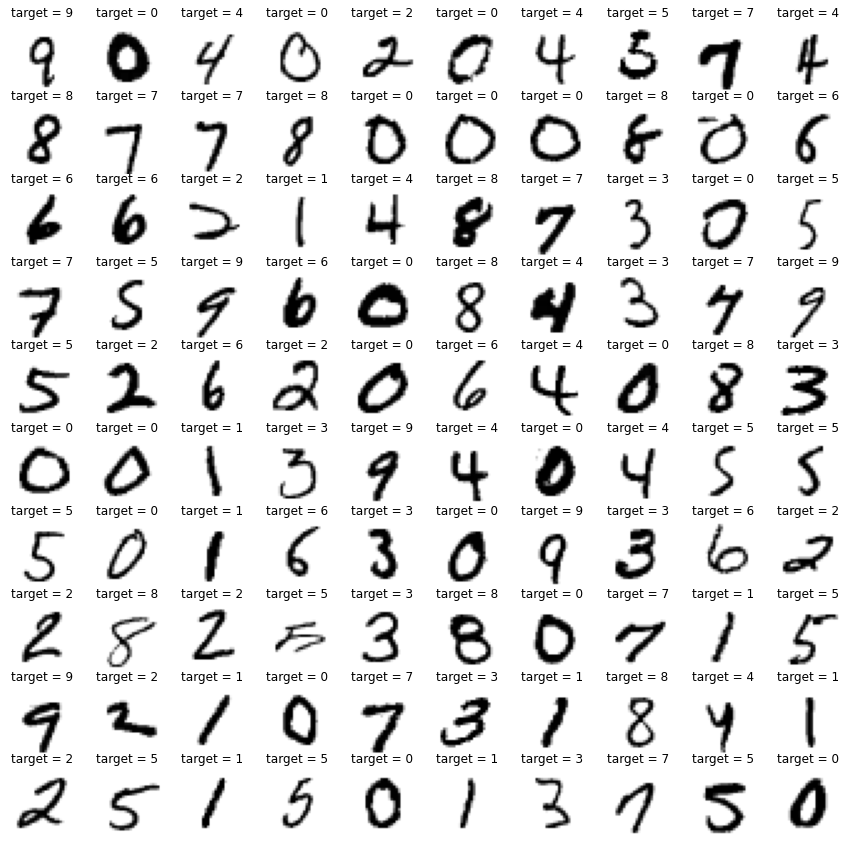

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#0 Fetch MNIST data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"].astype(np.uint8)

#1 Create Test Set (mnist is already shuffled and organized train/test)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

nb_imgs = 100
rnd_idx = np.random.choice(np.arange(0,len(X_train)), nb_imgs)

nrows, ncols = 10,10
plt.subplots(nrows, ncols, figsize = (15,15))
for i in range(len(rnd_idx)):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(X_train[rnd_idx[i]].reshape(28,28), cmap = mpl.cm.binary)
    plt.axis('off')
    plt.title('target = ' + str(y_train[rnd_idx[i]]))

In [ ]:
#Train
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Test
y_hat = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

print(confusion_matrix(y_test, y_hat))


[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]
